In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outsof the current session

/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


In [ ]:
df = pd.read_csv('/kaggle/input/2023-data-scientists-salary/ds_salaries.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Experience Levels')

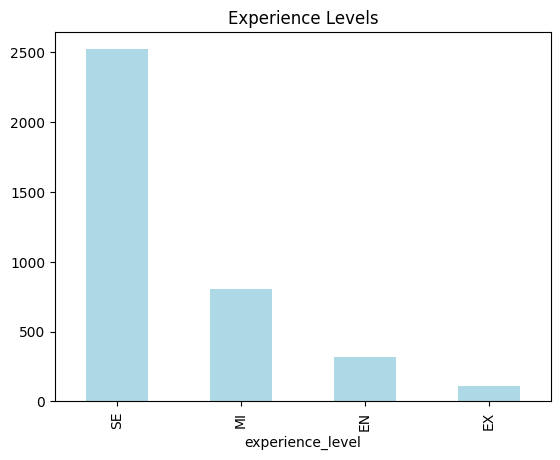

In [ ]:
df.experience_level.value_counts().plot.bar(color='lightblue')
plt.title('Experience Levels')

Text(0.5, 1.0, 'Employment Type')

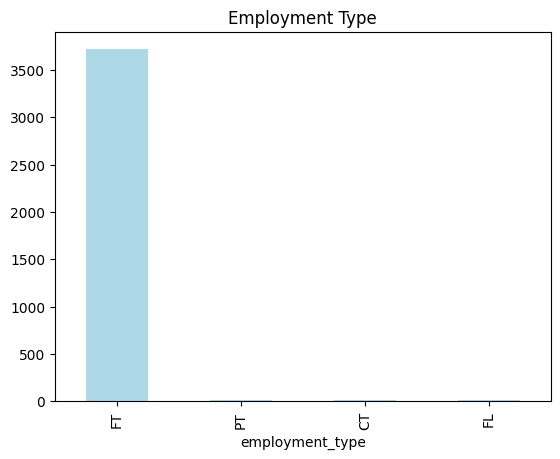

In [ ]:
df.employment_type.value_counts().plot.bar(color='lightblue')
plt.title('Employment Type')

In [ ]:
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [ ]:
se = df[df.experience_level=='SE']
mi = df[df.experience_level=='MI']
en = df[df.experience_level=='EN']
ex = df[df.experience_level=='EX']

Text(0.5, 1.0, 'Mean salary at each Experience Level')

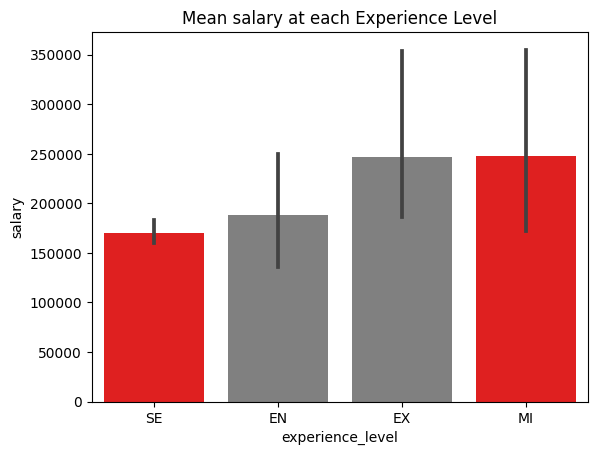

In [ ]:
sns.barplot(x='experience_level',y='salary',palette = ['red','grey','grey','red'],data=df,order = df.groupby('experience_level')['salary'].agg('mean').sort_values().index)
plt.title('Mean salary at each Experience Level')

Text(0.5, 1.0, 'Are there any outliers in the salaries at each experience level?')

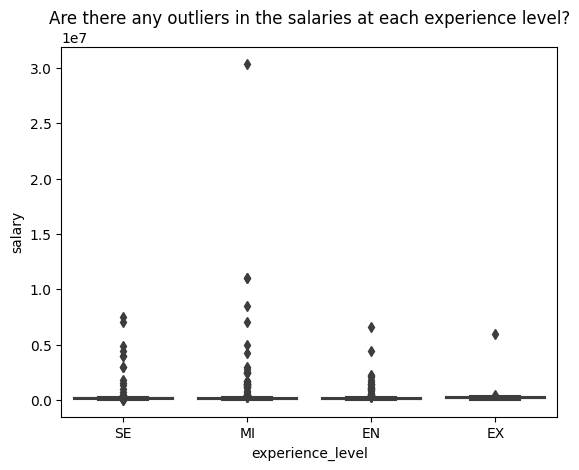

In [ ]:
sns.boxplot(x='experience_level',y='salary',data=df)
plt.title('Are there any outliers in the salaries at each experience level?')

several outliers detected.

Text(0.5, 1.0, 'Box-Plot without outliers')

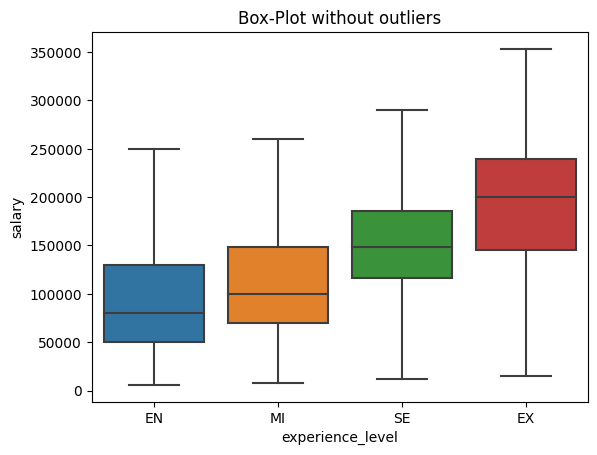

In [ ]:
sns.boxplot(x='experience_level',y='salary',data=df,showfliers=False, order = df.groupby('experience_level')['salary_in_usd'].agg('median').sort_values().index)
plt.title('Box-Plot without outliers')

The plot without outliers indicates that the outliers had great influence on the order of the bars.

Replotting the bar graph using the median and means of the salaries.

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
from scipy.stats import zscore
def remove_outliers(column):
    zscores = zscore(column)
    mask = (abs(zscores)<=3)
    return column[mask]
df_no_outliers = df.copy()
df_no_outliers[['salary','salary_in_usd']]= df_no_outliers[['salary','salary_in_usd']].apply(remove_outliers,axis=1)

In [ ]:
df_no_outliers.dropna(inplace=True)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

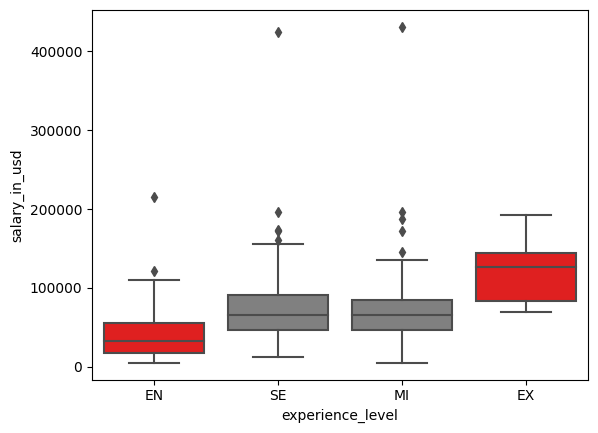

In [ ]:
sns.boxplot(x='experience_level',y='salary_in_usd',palette = ['red','grey','grey','red'],data=df_no_outliers,order = df_no_outliers.groupby('experience_level')['salary'].agg('median').sort_values().index)


There are still some outliers. a clear trend can be seen. Expert experience level seem to pay the most.

/tmp/ipykernel_42/3434005113.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='experience_level',y='salary_in_usd',ci=None,palette = ['red','grey','grey','red'],data=df_no_outliers,order = df_no_outliers.groupby('experience_level')['salary_in_usd'].agg('median').sort_values().index)


Text(0.5, 1.0, 'Median Salary for each experience level')

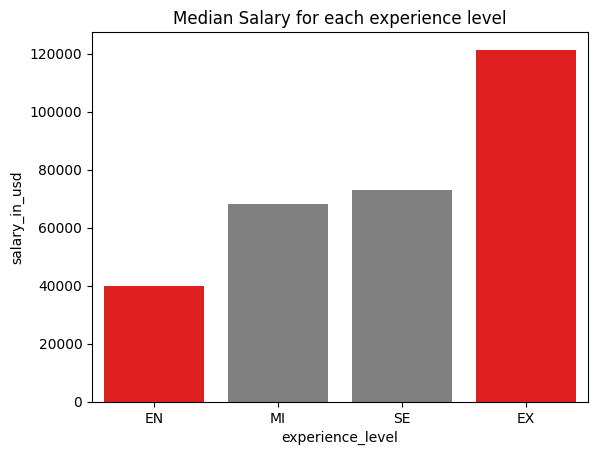

In [ ]:
sns.barplot(x='experience_level',y='salary_in_usd',ci=None,palette = ['red','grey','grey','red'],data=df_no_outliers,order = df_no_outliers.groupby('experience_level')['salary_in_usd'].agg('median').sort_values().index)
plt.title('Median Salary for each experience level')

<Axes: ylabel='Frequency'>

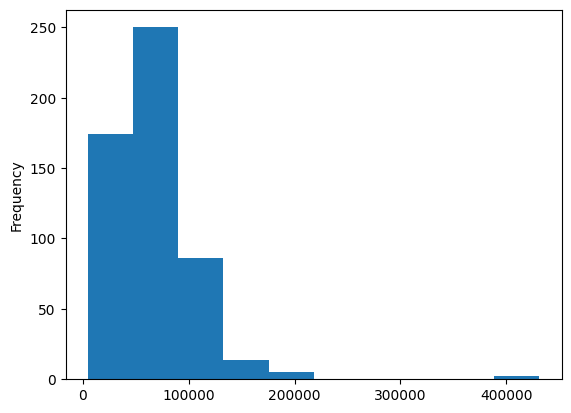

In [ ]:
df_no_outliers.salary_in_usd.plot.hist()

outlier found above 300,000.

Text(0.5, 1.0, 'Salary (USD) of Senior and Expert experience level')

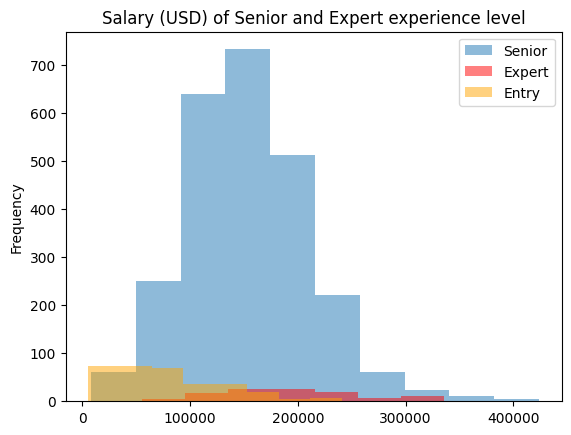

In [ ]:
se.salary_in_usd.plot.hist(alpha=.5,label='Senior')
ex.salary_in_usd.plot.hist(alpha=.5,color='red',label='Expert')
en.salary_in_usd.plot.hist(alpha=.5,color='orange',label='Entry')
plt.legend()
plt.title('Salary (USD) of Senior and Expert experience level')

/tmp/ipykernel_42/3415432110.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='experience_level',y='salary_in_usd',ci=None,palette = ['red','grey','grey','red'],data=df_no_outliers,order = df_no_outliers.groupby('experience_level')['salary_in_usd'].agg('mean').sort_values().index)


Text(0.5, 1.0, 'Mean Salary(usd) for each experience level')

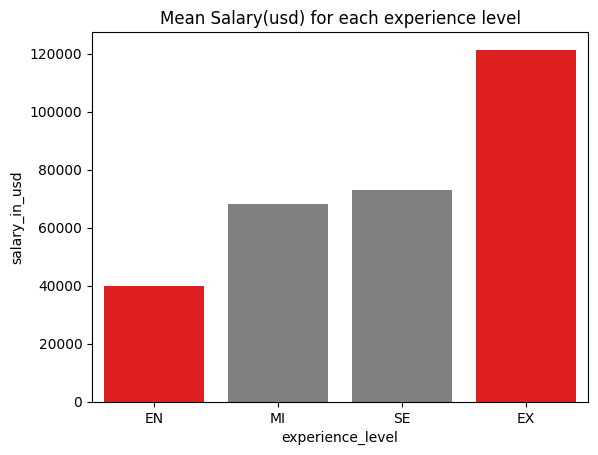

In [ ]:
sns.barplot(x='experience_level',y='salary_in_usd',ci=None,palette = ['red','grey','grey','red'],data=df_no_outliers,order = df_no_outliers.groupby('experience_level')['salary_in_usd'].agg('mean').sort_values().index)
plt.title('Mean Salary(usd) for each experience level')